In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [2]:
# Baseline JSRUN
exp1_sessions = pd.read_csv('../data/exp1/sessions.csv', index_col=0)
exp1_pilots = pd.read_csv('../data/exp1/pilots.csv', index_col=0)
exp1_units = pd.read_csv('../data/exp1/units.csv', index_col=0)

# Baseline PRRTE
exp2_sessions = pd.read_csv('../data/exp2/sessions.csv', index_col=0)
exp2_pilots = pd.read_csv('../data/exp2/pilots.csv', index_col=0)
exp2_units = pd.read_csv('../data/exp2/units.csv', index_col=0)

# Multi subagents PRRTE
# exp3_sessions = pd.read_csv('../data/exp3/sessions.csv', index_col=0)
# exp3_pilots = pd.read_csv('../data/exp3/pilots.csv', index_col=0)
# exp3_units = pd.read_csv('../data/exp3/units.csv', index_col=0)

# Single subagent, ssh comm method, manually increased processes PRRTE
exp4_sessions = pd.read_csv('../data/exp4/sessions.csv', index_col=0)
exp4_pilots = pd.read_csv('../data/exp4/pilots.csv', index_col=0)
exp4_units = pd.read_csv('../data/exp4/units.csv', index_col=0)

# Single subagent, ssh comm method, manually increased processes PRRTE
exp4_prrte_sessions = pd.read_csv('../data/exp4/sessions_prte.csv', index_col=0)
exp4_prrte_units = pd.read_csv('../data/exp4/units_prte.csv', index_col=0)

# Plot task overhead for task execution communication
exp4_prrte_phase2 = pd.read_csv('../data/exp4/prrte_phase2.csv')

In [3]:
# Cleanup Exp4 spurious runs
# exp4_sessions.drop('rp.session.login4.mturilli1.018122.0001', axis=0, inplace=True)
# exp4_sessions.drop('rp.session.login4.mturilli1.018122.0000', axis=0, inplace=True)
# exp4_sessions.drop('rp.session.login4.mturilli1.018127.0003', axis=0, inplace=True)
# exp4_sessions.drop('rp.session.login4.mturilli1.018122.0004', axis=0, inplace=True)
# exp4_sessions.drop('rp.session.login4.mturilli1.018123.0000', axis=0, inplace=True)

In [4]:
print 'Experiment 1: Baseline: Total number of successful runs: %s' % exp1_sessions.shape[0]
print 'Experiment 1: Baseline: Total number of pilots: %s' % exp1_pilots.shape[0]
print 'Experiment 1: Baseline: Total number of units: %s\n' % exp1_units.shape[0]

print 'Experiment 2: Baseline: Total number of successful runs: %s' % exp2_sessions.shape[0]
print 'Experiment 2: Baseline: Total number of pilots: %s' % exp2_pilots.shape[0]
print 'Experiment 2: Baseline: Total number of units: %s\n' % exp2_units.shape[0]

# print 'Experiment 3: Baseline: Total number of successful runs: %s' % exp3_sessions.shape[0]
# print 'Experiment 3: Baseline: Total number of pilots: %s' % exp3_pilots.shape[0]
# print 'Experiment 3: Baseline: Total number of units: %s\n' % exp3_units.shape[0]

print 'Experiment 4: Baseline: Total number of successful runs: %s' % exp4_sessions.shape[0]
print 'Experiment 4: Baseline: Total number of pilots: %s' % exp4_pilots.shape[0]
print 'Experiment 4: Baseline: Total number of units: %s\n' % exp4_units.shape[0]

Experiment 1: Baseline: Total number of successful runs: 26
Experiment 1: Baseline: Total number of pilots: 32
Experiment 1: Baseline: Total number of units: 5257

Experiment 2: Baseline: Total number of successful runs: 24
Experiment 2: Baseline: Total number of pilots: 24
Experiment 2: Baseline: Total number of units: 4095

Experiment 4: Baseline: Total number of successful runs: 11
Experiment 4: Baseline: Total number of pilots: 11
Experiment 4: Baseline: Total number of units: 65536



In [5]:
exp1_sessions.loc[exp1_sessions.ncore == 84, 'ncore'] = 168
exp1_sessions['nnode'] = exp1_sessions.ncore/168
exp1_sessions['list'] = exp1_sessions[['nunit', 'nnode']].astype(
    int, errors='ignore').astype('str').values.tolist()
exp1_sessions['nunitnode'] = exp1_sessions['list'].apply('/'.join)

exp1_ws = exp1_sessions[['nunit', 'nunitnode', 'TTC', 'P_LRMS_QUEUING', 'U_AGENT_QUEUING',
                         'U_AGENT_SCHEDULING', 'U_AGENT_QUEUING_EXEC', 'U_AGENT_EXECUTING',
                         'cu_exec_start_stop', 'nunit_failed', 'util_p_total']
                        ].groupby(['nunit', 'nunitnode']).aggregate(
    {'TTC': ['mean', 'std'],
     'P_LRMS_QUEUING': ['mean', 'std'],
     'U_AGENT_QUEUING': ['mean', 'std'],
     'U_AGENT_SCHEDULING': ['mean', 'std'],
     'U_AGENT_QUEUING_EXEC': ['mean', 'std'],
     'U_AGENT_EXECUTING': ['mean', 'std'],
     'cu_exec_start_stop': ['mean', 'std'],
     'util_p_total': ['mean', 'std'],
     'nunit_failed': ['mean']
     })

exp1_ws.rename({'P_LRMS_QUEUING': 'TTQ'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING': 'Agent queueing'},
               axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_SCHEDULING': 'Agent scheduling'},
               axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING_EXEC': 'Agent queueing execution'},
               axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_EXECUTING': 'TTX Agent'},
               axis='columns', inplace=True)
exp1_ws.rename({'cu_exec_start_stop': 'TTX Unit'},
               axis='columns', inplace=True)
exp1_ws.rename({'util_p_total': 'TTX'}, axis='columns', inplace=True)

exp1_ws = exp1_ws.sort_values("nunit")
exp1_ws

TTQ              nunit_failed         TTX                      TTC                Agent scheduling              TTX Unit            Agent queueing           Agent queueing execution             TTX Agent           
                        mean          std         mean        mean        std          mean            std             mean       std        mean        std           mean       std                     mean       std        mean        std
nunit nunitnode                                                                                                                                                                                                                                
1     1/1          59.459004    42.339110          0.0  955.909833  39.684714  1.562854e+09    5136.458185         0.003607  0.000579  900.547132   0.186629       0.000788  0.000076                 0.000792  0.000037  900.610458   0.160406
2     2/1          42.557972    12.833052          0.0  930.299400   1.619132  1.564014e+09  695273.555382         0.003448  0.000320  900.619918   0.454588       0.000911  0.000041                 0.007444  0.000146  900.696172   0.428455
4     4/1          65.701483    49.882463          0.0  931.966000   2.087662  1.563887e+09  978762.745899         0.007426  0.000476  900.377831   0.016287       0.001303  0.000098                 0.024567  0.000512  900.488166   0.005523
8     8/1          39.701245    10.621779          0.0  936.557900   7.435652  1.563890e+09  980892.543357         0.014557  0.000672  900.433873   0.000847       0.003250  0.000474                 0.064787  0.003609  900.476350   0.014292
16    16/1         31.662136     2.446324          0.0  929.510100   1.737361  1.563894e+09  984922.738598         0.028208  0.001826  900.627073   0.000387       0.003964  0.000599                 0.225481  0.044294  900.716311   0.001643
32    32/1         78.292810    57.091040          0.0  932.576050   2.798799  1.563894e+09  983094.153602         0.052822  0.000561  901.326492   0.617766       0.005668  0.000118                 0.449643  0.013136  901.414377   0.583922
64    64/2         53.687704    31.287596          0.0  933.667600   0.723370  1.563646e+09  234648.595533         0.106535  0.002742  901.308607   0.052904       0.011727  0.000096                 1.035330  0.068996  901.396330   0.095494
128   128/4       127.660921   131.673098          0.0  939.892500   6.747213  1.564237e+09  505081.313749         0.270433  0.008946  902.665787   0.405403       0.021218  0.000017                 2.024406  0.095112  902.753368   0.366134
256   256/7       113.375720   119.402988          0.0  936.314950   0.125512  1.564259e+09  507769.592928         0.715442  0.015333  905.102004   0.778279       0.041037  0.000412                 4.587034  0.575951  905.189366   0.763868
512   512/13       34.897546     2.431985          0.0  941.023650   0.880418  1.564270e+09  521495.909719         1.675351  0.139489  909.280210   0.430718       0.080364  0.000862                 9.005657  0.411434  909.350081   0.444054
1024  1024/25     617.458293   613.676073         57.5  969.024450   4.138201  1.563908e+09    7266.035433         4.112562  0.269654  936.334963   0.059782       0.155643  0.000663                16.287116  0.094822  936.441911   0.060744
2048  2048/49    4224.976741  5915.143289       1080.5  985.696750  20.555099  1.564357e+09  435693.312143        17.968268  0.010471  952.855749  21.058040       0.309970  0.000104                23.787571  1.224119  952.913288  21.051754

In [6]:
exp2_sessions.loc[exp2_sessions.ncore == 84, 'ncore'] = 168
exp2_sessions['nnode'] = exp2_sessions.ncore/168
exp2_sessions['list'] = exp2_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp2_sessions['nunitnode'] = exp2_sessions['list'].apply('/'.join)

exp2_ws = exp2_sessions[
                        ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
                         'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
                         'cu_exec_start_stop','nunit_failed','util_p_total']
                       ].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'util_p_total'        : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp2_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp2_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp2_ws.rename({'util_p_total'        :'TTX'}, axis='columns', inplace=True)

exp2_ws = exp2_ws.sort_values("nunit")
exp2_ws

TTQ              nunit_failed         TTX                      TTC               Agent scheduling              TTX Unit           Agent queueing           Agent queueing execution             TTX Agent          
                        mean          std         mean        mean        std          mean           std             mean       std        mean       std           mean       std                     mean       std        mean       std
nunit nunitnode                                                                                                                                                                                                                             
1     1/1          43.968997    16.259856          0.0   933.30500   9.006561  1.564507e+09  98873.883631         0.002005  0.000018  900.182332  0.133985       0.000846  0.000076                 0.000731  0.000025  900.373097  0.142088
2     2/1          36.255364     2.680791          0.0   928.20540   1.776959  1.564521e+09  70597.280831         0.004200  0.000050  900.185613  0.003187       0.000927  0.000044                 0.111029  0.005562  900.349310  0.022910
4     4/1          33.362355     1.538903          0.0   930.30315   4.027044  1.564523e+09  66820.676286         0.008955  0.000778  900.404757  0.004772       0.001351  0.000120                 0.325567  0.002135  900.558405  0.015118
8     8/1         577.065725   737.370715          0.0   940.56260   1.250306  1.564518e+09  58891.057395         0.018128  0.000195  900.843271  0.006630       0.003399  0.000145                 0.764067  0.001406  901.057842  0.005352
16    16/1         53.538131    13.132927          0.0   939.24305   4.053348  1.564519e+09  51158.463340         0.034270  0.000401  901.775495  0.037882       0.003152  0.000063                 1.697455  0.036994  901.936941  0.042138
32    32/1        287.904916   354.159341          0.0   936.57240   3.044236  1.564523e+09  42546.180590         0.066873  0.000661  903.578035  0.096324       0.005958  0.000144                 3.497538  0.092924  903.762297  0.124624
64    64/2         50.253903    20.248927          0.0   938.73470   2.594375  1.564545e+09  66818.471443         0.132313  0.000650  907.122170  0.061795       0.011809  0.000202                 7.046248  0.058666  907.334008  0.050969
128   128/4       113.512645    69.663776          0.0   948.91340   4.255510  1.564546e+09  66880.540488         0.268213  0.001523  914.314947  0.150133       0.022310  0.000163                14.231669  0.141986  914.483081  0.180268
256   256/7        40.457664     6.086513          0.0   965.03575   5.465582  1.564560e+09  79726.061343         0.568507  0.014562  928.823017  0.249286       0.041228  0.000016                28.744293  0.258761  928.966843  0.244877
512   512/13     2173.352623  3021.885591          0.0   999.36160   8.080251  1.564573e+09  91216.790981         1.271925  0.049166  957.922123  0.396208       0.085318  0.008160                57.833149  0.386920  958.113472  0.405857
1024  1024/25     741.760829  1005.570175        254.0  1024.51600  10.978823  1.564578e+09  89608.041980         2.726785  0.044331  987.176202  0.871434       0.156877  0.000486               115.597231  2.331131  987.374714  0.904861
2048  2048/49    2714.251405  3682.955637       1292.5  1025.12850   6.662219  1.564586e+09  94439.734765        91.009773  1.666997  987.357174  2.545688       0.356409  0.050753               225.828357  5.270459  987.548610  2.515038

In [7]:
# exp3_sessions.loc[exp3_sessions.ncore == 84, 'ncore'] = 168
# exp3_sessions['nnode'] = exp3_sessions.ncore/168
# exp3_sessions['list'] = exp3_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
# exp3_sessions['nunitnode'] = exp3_sessions['list'].apply('/'.join)

# exp3_ws = exp3_sessions[
#     ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
#      'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
#      'cu_exec_start_stop','nunit_failed']].groupby(['nunit','nunitnode']).aggregate(
#                 {'TTC'                 : ['mean','std'],
#                  'P_LRMS_QUEUING'      : ['mean','std'],
#                  'U_AGENT_QUEUING'     : ['mean','std'],
#                  'U_AGENT_SCHEDULING'  : ['mean','std'],
#                  'U_AGENT_QUEUING_EXEC': ['mean','std'],
#                  'U_AGENT_EXECUTING'   : ['mean','std'],
#                  'cu_exec_start_stop'  : ['mean','std'],
#                  'nunit_failed'        : ['mean']
#                 })

# exp3_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
# exp3_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
# exp3_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
# exp3_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
# exp3_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
# exp3_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)

# exp3_ws = exp3_ws.sort_values("nunit")
# exp3_ws

In [8]:
exp4_sessions.loc[exp4_sessions.ncore == 84, 'ncore'] = 168
exp4_sessions['nnode'] = exp4_sessions.ncore/168
exp4_sessions['nnode'] = exp4_sessions['nnode'].apply(np.ceil)
exp4_sessions['list'] = exp4_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp4_sessions['nunitnode'] = exp4_sessions['list'].apply('/'.join)

exp4_ws = exp4_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop','nunit_failed','util_p_total']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'util_p_total'        : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp4_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp4_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp4_ws.rename({'util_p_total'        :'TTX'}, axis='columns', inplace=True)

exp4_ws = exp4_ws.sort_values("nunit")
exp4_ws

TTQ              nunit_failed          TTX                       TTC                Agent scheduling               TTX Unit            Agent queueing           Agent queueing execution               TTX Agent           
                        mean          std         mean         mean         std          mean            std             mean       std         mean        std           mean       std                     mean        std         mean        std
nunit nunitnode                                                                                                                                                                                                                                     
1024  1024/26      62.138335     2.044089            0  1262.774100  228.521638  1.565891e+09    1197.888502         3.525402  1.112794  1029.523494  12.450692       6.074605  3.846145               129.496681  12.371917  1029.799317  12.386044
2048  2048/51    3321.691144  1797.622708            0  1290.376667   35.849751  1.566122e+09  201015.599012         6.917727  0.053415  1177.496137   1.836337       8.171157  0.105839               277.404578   1.828776  1177.697757   1.834351
4096  4096/101   1107.280731   389.605431            0  1533.592650    3.323190  1.566283e+09   24858.873702        18.923690  0.015265  1453.791537   0.995575      21.416204  0.161790               553.672961   0.968872  1454.006711   1.004316
8192  8192/202   1073.793338  1410.478176            0  2096.037950    3.075844  1.565890e+09    1390.698726        58.958676  0.181679  2015.041753   0.903093      63.883618  0.104586              1114.864786   0.920683  2015.256482   0.889548
16384 16384/410  7640.860945  3835.525718            0  3235.952600    8.007843  1.566395e+09   20380.394312       205.294122  6.426163  3127.766465   7.847302     215.039598  6.690071              2227.418262   7.845788  3127.977219   7.847944

In [9]:
# Add metadata to PRRTE profiles 
exp4_prrte_sessions['nunit'] = exp4_sessions.nunit
exp4_prrte_sessions['ncore'] = exp4_sessions.ncore 
exp4_prrte_sessions.loc[exp4_prrte_sessions.ncore == 84, 'ncore'] = 168
exp4_prrte_sessions['nnode'] = exp4_prrte_sessions.ncore/168
exp4_prrte_sessions['nnode'] = exp4_prrte_sessions['nnode'].apply(np.ceil)
exp4_prrte_sessions['list'] = exp4_prrte_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp4_prrte_sessions['nunitnode'] = exp4_prrte_sessions['list'].apply('/'.join)

exp4_prrte_ws = exp4_prrte_sessions.groupby(['nunit','nunitnode']).aggregate(
                {
                    'prte_init_complete_to_prte_pending_allocation'            : ['mean','std'],
                    'prte_pending_allocation_to_prte_allocation_complete'      : ['mean','std'],
                    'prte_allocation_complete_to_prte_pending_daemon_launch'   : ['mean','std'],
                    'prte_pending_daemon_launch_to_prte_all_daemons_reported'  : ['mean','std'],
                    'prte_all_daemons_reported_to_prte_vm_ready'               : ['mean','std'],
                    'prte_vm_ready_to_prte_pending_mapping'                    : ['mean','std'],
                    'prte_pending_mapping_to_prte_map_complete'                : ['mean','std'],
                    'prte_map_complete_to_prte_pending_final_system_prep'      : ['mean','std'],
                    'prte_pending_final_system_prep_to_prte_pending_app_launch': ['mean','std'],
                    'prte_pending_app_launch_to_prte_sending_launch_msg'       : ['mean','std'],
                    'prte_sending_launch_msg_to_prte_running'                  : ['mean','std'],
                    'prte_running_to_prte_local_launch_complete'               : ['mean','std'],
                    'prte_local_launch_complete_to_prte_running'               : ['mean','std'],
                    'prte_running_to_prte_running'                             : ['mean','std'],
                    'prte_running_to_prte_iof_complete'                        : ['mean','std'],
                    'prte_iof_complete_to_prte_waitpid_fired'                  : ['mean','std'],
                    'prte_waitpid_fired_to_prte_normally_terminated'           : ['mean','std'],
                    'prte_normally_terminated_to_prte_normally_terminated'     : ['mean','std'],
                    'prte_normally_terminated_to_prte_normally_terminated.1'   : ['mean','std'],
                    'prte_normally_terminated_to_prte_notify_completed'        : ['mean','std']
                })

exp4_prrte_ws.rename({'prte_init_complete_to_prte_pending_allocation'            : 'pending allocation'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_pending_allocation_to_prte_allocation_complete'      : 'allocation complete'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_allocation_complete_to_prte_pending_daemon_launch'   : 'pending daemon launch'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_pending_daemon_launch_to_prte_all_daemons_reported'  : 'all daemons reported'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_all_daemons_reported_to_prte_vm_ready'               : 'vm ready'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_vm_ready_to_prte_pending_mapping'                    : 'pending mapping'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_pending_mapping_to_prte_map_complete'                : 'prte map complete'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_map_complete_to_prte_pending_final_system_prep'      : 'pending final system prep'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_pending_final_system_prep_to_prte_pending_app_launch': 'pending app launch'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_pending_app_launch_to_prte_sending_launch_msg'       : 'sending launch msg'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_sending_launch_msg_to_prte_running'                  : 'prte running 0'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_running_to_prte_local_launch_complete'               : 'launch complete'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_local_launch_complete_to_prte_running'               : 'prte running 1'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_running_to_prte_running'                             : 'prte running 2'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_running_to_prte_iof_complete'                        : 'iof complete'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_iof_complete_to_prte_waitpid_fired'                  : 'waitpid fired'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_waitpid_fired_to_prte_normally_terminated'           : 'normally terminated 0'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_normally_terminated_to_prte_normally_terminated'     : 'normally terminated 1'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_normally_terminated_to_prte_normally_terminated.1'   : 'normally terminated 2'}, axis='columns', inplace=True)
exp4_prrte_ws.rename({'prte_normally_terminated_to_prte_notify_completed'        : 'notify completed'}, axis='columns', inplace=True)

exp4_prrte_ws = exp4_prrte_ws.sort_values("nunit")
exp4_prrte_ws

prte running 2           pending allocation           pending daemon launch           waitpid fired           pending mapping            ... normally terminated 0           normally terminated 2           all daemons reported           iof complete            prte running 0          
                          mean       std               mean       std                  mean       std          mean       std            mean       std  ...                  mean       std                  mean       std                 mean       std         mean        std           mean       std
nunit nunitnode                                                                                                                                          ...                                                                                                                                                
1024  1024/26         0.509235  0.145600           0.006935  0.001308              0.006090  0.000750      0.147565  0.000445        0.007485  0.002058  ...              0.014670  0.000028              0.185860  0.003818             0.010760  0.001442   1029.29271  12.481623       9.873005  0.288535
2048  2048/51         0.953163  0.219475           0.015270  0.001506              0.013457  0.001303      0.296317  0.002139        0.014853  0.000955  ...              0.029583  0.000284              0.442000  0.042268             0.024310  0.002483   1177.19589   1.710944      25.354217  2.940055
4096  4096/101        1.252470  0.042822           0.027570  0.002192              0.024870  0.001513      0.598510  0.001400        0.029100  0.000311  ...              0.059225  0.000035              0.890080  0.106476             0.062535  0.003585   1453.42969   0.828885      61.750490  0.015995
8192  8192/202        3.506720  0.511153           0.115885  0.036649              0.051935  0.002539      1.201120  0.005020        0.058580  0.001739  ...              0.128090  0.000113              3.942940  1.479875             0.197520  0.003493   2014.69324   0.857424     181.260795  2.250304
16384 16384/410      18.414275  3.342826           0.860760  0.518295              0.162300  0.074190      2.426895  0.000262        0.207595  0.009539  ...              0.260655  0.005296             12.654525  6.933090             0.690315  0.131048   3127.19954   7.844303     515.744380  2.847010

[5 rows x 40 columns]

In [10]:
# Total agent time = 'util_p_total'
# ru.EVENT: 'bootstrap_0_stop' - ru.EVENT: 'bootstrap_0_start'

ttc1 = exp1_ws[['TTX']]
ttc1.rename({'TTX': 'TTX JSRUN'}, axis='columns', inplace=True)
ttc1.columns = [' '.join(col).strip() for col in ttc1.columns.values]
ttc1 = ttc1.sort_values("nunit")
ttc1 = ttc1.reset_index()

ttc2 = exp2_ws[['TTX']]
ttc2.rename({'TTX': 'TTX PRRTE'}, axis='columns', inplace=True)
ttc2.columns = [' '.join(col).strip() for col in ttc2.columns.values]
ttc2 = ttc2.sort_values("nunit")
ttc2 = ttc2.reset_index()

ttc = ttc1.join(ttc2[['TTX PRRTE mean', 'TTX PRRTE std']])

ttc

/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,nunit,nunitnode,TTX JSRUN mean,TTX JSRUN std,TTX PRRTE mean,TTX PRRTE std
0,1,1/1,955.909833,39.684714,933.30500,9.006561
1,2,2/1,930.299400,1.619132,928.20540,1.776959
2,4,4/1,931.966000,2.087662,930.30315,4.027044
3,8,8/1,936.557900,7.435652,940.56260,1.250306
4,16,16/1,929.510100,1.737361,939.24305,4.053348
5,32,32/1,932.576050,2.798799,936.57240,3.044236
6,64,64/2,933.667600,0.723370,938.73470,2.594375
7,128,128/4,939.892500,6.747213,948.91340,4.255510
8,256,256/7,936.314950,0.125512,965.03575,5.465582
9,512,512/13,941.023650,0.880418,999.36160,8.080251


In [11]:
# Total agent time = 'util_p_total'
# ru.EVENT: 'bootstrap_0_stop' - ru.EVENT: 'bootstrap_0_start'

ttc4 = exp4_ws[['TTX']]
ttc4.rename({'TTX': 'TTX PRRTE'}, axis='columns', inplace=True)
ttc4.columns = [' '.join(col).strip() for col in ttc4.columns.values]
ttc4 = ttc4.sort_values("nunit")
ttc4 = ttc4.reset_index()

ttc4

,nunit,nunitnode,TTX PRRTE mean,TTX PRRTE std
0,1024,1024/26,1262.774100,228.521638
1,2048,2048/51,1290.376667,35.849751
2,4096,4096/101,1533.592650,3.323190
3,8192,8192/202,2096.037950,3.075844
4,16384,16384/410,3235.952600,8.007843


In [12]:
# Total agent time = 
#    ru.STATE: rp.AGENT_SCHEDULING             - ru.STATE: rp.AGENT_SCHEDULING_PENDING +
#    ru.STATE: rp.AGENT_EXECUTING_PENDING      - ru.STATE: rp.AGENT_SCHEDULING         +
#    ru.STATE: rp.AGENT_EXECUTING              - ru.STATE: rp.AGENT_EXECUTING_PENDING  +
#    ru.STATE: rp.AGENT_STAGING_OUTPUT_PENDING - ru.STATE: rp.AGENT_EXECUTING          -
#    ru.EVENT: 'cu_exec_stop'                  - ru.EVENT: 'cu_exec_start'
#
# Total task execution time = 900 (derived analytically from the time passed to stress)

oh1 = exp1_ws.copy(deep=True)
oh1.loc[:,('TTX Agent','mean')] = (oh1.loc[:,('Agent queueing','mean')]            + \
                                   oh1.loc[:,('Agent scheduling','mean')]          + \
                                   oh1.loc[:,('Agent queueing execution','mean')]) + \
                                  (oh1.loc[:,('TTX Agent','mean')]                 - \
                                   oh1.loc[:,('TTX Unit','mean')])
oh1.loc[:,('TTX Unit','mean')]  = oh1.loc[:,('TTX Unit','mean')] - 900
oh1.loc[:,('nunit_failed','mean')] = oh1.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh1.rename({'TTX Agent': 'RP Overhead with JSRUN'}, axis='columns', inplace=True)
oh1.rename({'TTX Unit' : 'JSRUN Overhead'}, axis='columns', inplace=True)

oh1.columns = [' '.join(col).strip() for col in oh1.columns.values]

oh1 = oh1.sort_values("nunit")
oh1 = oh1.reset_index()

In [13]:
oh2 = exp2_ws.copy(deep=True)
oh2.loc[:,('TTX Agent','mean')] = oh2.loc[:,('Agent queueing','mean')]           + \
                                  oh2.loc[:,('Agent scheduling','mean')]         + \
                                  oh2.loc[:,('Agent queueing execution','mean')] + \
                                  oh2.loc[:,('TTX Agent','mean')]                - \
                                  oh2.loc[:,('TTX Unit','mean')]
oh2.loc[:,('TTX Unit','mean')]  = oh2.loc[:,('TTX Unit','mean')] - 900
oh2.loc[:,('nunit_failed','mean')] = oh2.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh2.rename({'TTX Agent': 'RP Overhead with PRRTE'}, axis='columns', inplace=True)
oh2.rename({'TTX Unit' : 'PRRTE Overhead'}, axis='columns', inplace=True)

oh2.columns = [' '.join(col).strip() for col in oh2.columns.values]

oh2 = oh2.sort_values("nunit")
oh2 = oh2.reset_index()

In [14]:
# oh3 = exp3_ws.copy(deep=True)
# oh3.loc[:,('TTX Agent','mean')] = oh3.loc[:,('Agent queueing','mean')]           + \
#                                   oh3.loc[:,('Agent scheduling','mean')]         + \
#                                   oh3.loc[:,('Agent queueing execution','mean')] + \
#                                   oh3.loc[:,('TTX Agent','mean')]                - \
#                                   oh3.loc[:,('TTX Unit','mean')]
# oh3.loc[:,('TTX Unit','mean')] = oh3.loc[:,('TTX Unit','mean')] - 900
# oh3.loc[:,('nunit_failed','mean')] = oh3.loc[:,('nunit_failed','mean')].apply(np.ceil)

# oh3.rename({'TTX Agent': 'RP Overhead with PRRTE and subagents'}, axis='columns', inplace=True)
# oh3.rename({'TTX Unit' : 'PRRTE Overhead subagents'}, axis='columns', inplace=True)

# oh3.columns = [' '.join(col).strip() for col in oh3.columns.values]

# oh3 = oh3.sort_values("nunit")
# oh3 = oh3.reset_index()

In [15]:
oh4 = exp4_ws.copy(deep=True)
oh4.loc[:,('TTX Agent','mean')] = oh4.loc[:,('Agent queueing','mean')]           + \
                                  oh4.loc[:,('Agent scheduling','mean')]         + \
                                  oh4.loc[:,('Agent queueing execution','mean')] + \
                                  oh4.loc[:,('TTX Agent','mean')]                - \
                                  oh4.loc[:,('TTX Unit','mean')]

oh4.loc[:,('TTX Unit','mean')] = oh4.loc[:,('TTX Unit','mean')] - 900
oh4.loc[:,('nunit_failed','mean')] = oh4.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh4.rename({'TTX Agent': 'RP Overhead with PRRTE and subagent'}, axis='columns', inplace=True)
oh4.rename({'TTX Unit' : 'PRRTE Overhead subagent'}, axis='columns', inplace=True)

oh4.columns = [' '.join(col).strip() for col in oh4.columns.values]

oh4 = oh4.sort_values("nunit")
oh4 = oh4.reset_index()

oh4['PRRTE Wait'] = (oh4['nunit'] - oh4['nunit_failed mean']) * 0.1
oh4

,nunit,nunitnode,TTQ mean,TTQ std,nunit_failed mean,TTX mean,TTX std,TTC mean,TTC std,Agent scheduling mean,Agent scheduling std,PRRTE Overhead subagent mean,PRRTE Overhead subagent std,Agent queueing mean,Agent queueing std,Agent queueing execution mean,Agent queueing execution std,RP Overhead with PRRTE and subagent mean,RP Overhead with PRRTE and subagent std,PRRTE Wait
0,1024,1024/26,62.138335,2.044089,0.0,1262.774100,228.521638,1.565891e+09,1197.888502,3.525402,1.112794,129.523494,12.450692,6.074605,3.846145,129.496681,12.371917,139.372511,12.386044,102.4
1,2048,2048/51,3321.691144,1797.622708,0.0,1290.376667,35.849751,1.566122e+09,201015.599012,6.917727,0.053415,277.496137,1.836337,8.171157,0.105839,277.404578,1.828776,292.695081,1.834351,204.8
2,4096,4096/101,1107.280731,389.605431,0.0,1533.592650,3.323190,1.566283e+09,24858.873702,18.923690,0.015265,553.791537,0.995575,21.416204,0.161790,553.672961,0.968872,594.228030,1.004316,409.6
3,8192,8192/202,1073.793338,1410.478176,0.0,2096.037950,3.075844,1.565890e+09,1390.698726,58.958676,0.181679,1115.041753,0.903093,63.883618,0.104586,1114.864786,0.920683,1237.921808,0.889548,819.2
4,16384,16384/410,7640.860945,3835.525718,0.0,3235.952600,8.007843,1.566395e+09,20380.394312,205.294122,6.426163,2227.766465,7.847302,215.039598,6.690071,2227.418262,7.845788,2647.962737,7.847944,1638.4


In [16]:
oh = oh1.join(oh2[['RP Overhead with PRRTE mean',
                   'RP Overhead with PRRTE std',
                   'PRRTE Overhead mean',
                   'PRRTE Overhead std'
                  ]])
oh['PRRTE Wait'] = oh['nunit']*0.1

oh

,nunit,nunitnode,TTQ mean,TTQ std,nunit_failed mean,TTX mean,TTX std,TTC mean,TTC std,Agent scheduling mean,...,Agent queueing std,Agent queueing execution mean,Agent queueing execution std,RP Overhead with JSRUN mean,RP Overhead with JSRUN std,RP Overhead with PRRTE mean,RP Overhead with PRRTE std,PRRTE Overhead mean,PRRTE Overhead std,PRRTE Wait
0,1,1/1,59.459004,42.339110,0.0,955.909833,39.684714,1.562854e+09,5136.458185,0.003607,...,0.000076,0.000792,0.000037,0.068513,0.160406,0.194347,0.142088,0.182332,0.133985,0.1
1,2,2/1,42.557972,12.833052,0.0,930.299400,1.619132,1.564014e+09,695273.555382,0.003448,...,0.000041,0.007444,0.000146,0.088057,0.428455,0.279853,0.022910,0.185613,0.003187,0.2
2,4,4/1,65.701483,49.882463,0.0,931.966000,2.087662,1.563887e+09,978762.745899,0.007426,...,0.000098,0.024567,0.000512,0.143632,0.005523,0.489520,0.015118,0.404757,0.004772,0.4
3,8,8/1,39.701245,10.621779,0.0,936.557900,7.435652,1.563890e+09,980892.543357,0.014557,...,0.000474,0.064787,0.003609,0.125071,0.014292,1.000165,0.005352,0.843271,0.006630,0.8
4,16,16/1,31.662136,2.446324,0.0,929.510100,1.737361,1.563894e+09,984922.738598,0.028208,...,0.000599,0.225481,0.044294,0.346891,0.001643,1.896323,0.042138,1.775495,0.037882,1.6
5,32,32/1,78.292810,57.091040,0.0,932.576050,2.798799,1.563894e+09,983094.153602,0.052822,...,0.000118,0.449643,0.013136,0.596018,0.583922,3.754631,0.124624,3.578035,0.096324,3.2
6,64,64/2,53.687704,31.287596,0.0,933.667600,0.723370,1.563646e+09,234648.595533,0.106535,...,0.000096,1.035330,0.068996,1.241314,0.095494,7.402208,0.050969,7.122170,0.061795,6.4
7,128,128/4,127.660921,131.673098,0.0,939.892500,6.747213,1.564237e+09,505081.313749,0.270433,...,0.000017,2.024406,0.095112,2.403638,0.366134,14.690326,0.180268,14.314947,0.150133,12.8
8,256,256/7,113.375720,119.402988,0.0,936.314950,0.125512,1.564259e+09,507769.592928,0.715442,...,0.000412,4.587034,0.575951,5.430876,0.763868,29.497854,0.244877,28.823017,0.249286,25.6
9,512,512/13,34.897546,2.431985,0.0,941.023650,0.880418,1.564270e+09,521495.909719,1.675351,...,0.000862,9.005657,0.411434,10.831243,0.444054,59.381742,0.405857,57.922123,0.396208,51.2


/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


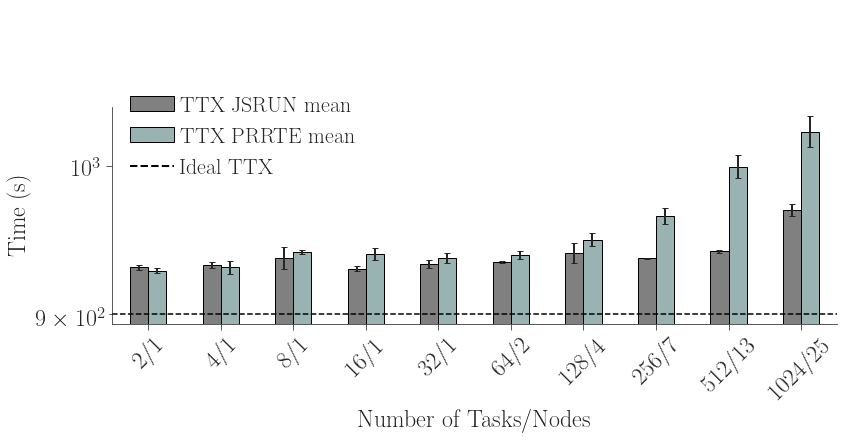

In [17]:
fig, ax = fig_setup(figsize=(13,4))

ax1 = ttc.loc[1:10].plot.bar(
    x='nunitnode', 
    y=['TTX JSRUN mean','TTX PRRTE mean'], 
    yerr=[ttc.loc[1:10]['TTX JSRUN std'],ttc.loc[1:10]['TTX PRRTE std']], 
    width=0.5, color=[tableau20[20],tableau20[22]], 
    logy=True,
    ax=ax, rot=45,
    legend=False)

ax1.axhline(y=900, lw=1.5, color='black', ls='dashed')

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
# ax.set_ylim(0)
# ax.set_xlim(-0.5)

fig.legend((#mpl.patches.Patch(facecolor=tableau20[1]), 
            mpl.patches.Patch(facecolor=tableau20[20]), 
            mpl.patches.Patch(facecolor=tableau20[22]),
            mpl.lines.Line2D([], [], color='black', linestyle='dashed')),
           ('TTX JSRUN mean', 'TTX PRRTE mean', 'Ideal TTX'), 
           'upper left',
           # ncol=2,
           columnspacing=0.75,
           handletextpad=0.3,
           bbox_to_anchor=(0.1175, 1.265))

plt.savefig('figures/paper_jsrun_prrte_weak_scaling_ttc.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_weak_scaling_ttc.png', dpi=300, bbox_inches='tight')

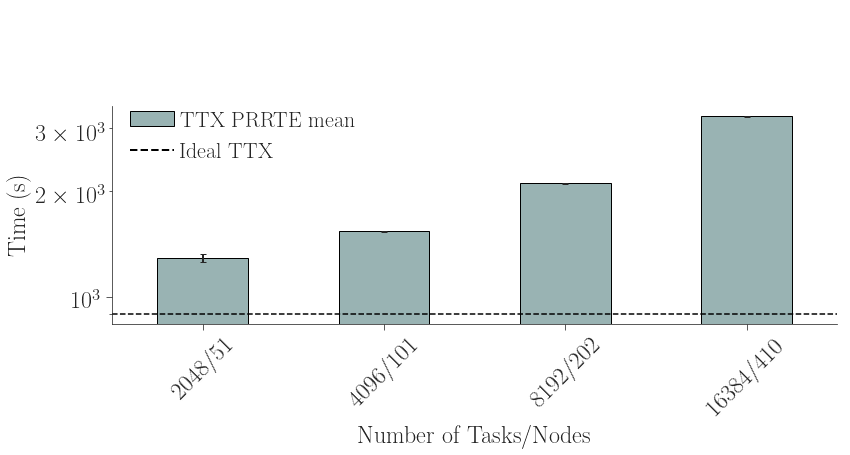

In [18]:
fig, ax = fig_setup(figsize=(13,4))

ax1 = ttc4.loc[1:10].plot.bar(
    x='nunitnode', 
    y='TTX PRRTE mean', 
    yerr='TTX PRRTE std', 
    width=0.5, color=tableau20[22], 
    logy=True,
    ax=ax, rot=45,
    legend=False)

ax1.axhline(y=900, lw=1.5, color='black', ls='dashed')

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
# ax.set_ylim(0)
# ax.set_xlim(-0.5)

fig.legend((# mpl.patches.Patch(facecolor=tableau20[1]), 
            # mpl.patches.Patch(facecolor=tableau20[20]), 
            mpl.patches.Patch(facecolor=tableau20[22]),
            mpl.lines.Line2D([], [], color='black', linestyle='dashed')),
           (# 'TTX JSRUN mean', 
            'TTX PRRTE mean', 'Ideal TTX'), 
           'upper left',
           # ncol=2,
           columnspacing=0.75,
           handletextpad=0.3,
           bbox_to_anchor=(0.1175, 1.265))

plt.savefig('figures/paper_jsrun_prrte_weak_scaling_ttc_prrte.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_weak_scaling_ttc_prrte.png', dpi=300, bbox_inches='tight')

/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


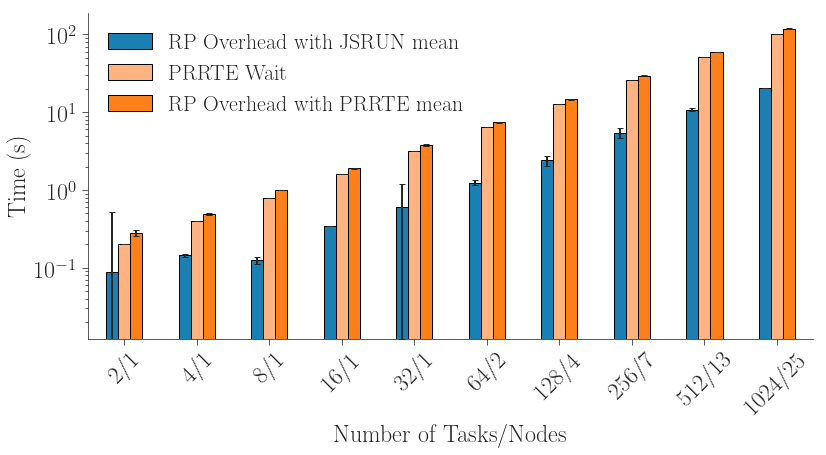

In [19]:
fig, ax = fig_setup(figsize=(13,6))

oh.loc[1:10].plot.bar(
    x   ='nunitnode', 
    y   = ['RP Overhead with JSRUN mean','PRRTE Wait','RP Overhead with PRRTE mean'],
    yerr= [oh.loc[1:10]['RP Overhead with JSRUN std'],oh.loc[1:10]['PRRTE Overhead std']*0,oh.loc[1:10]['RP Overhead with PRRTE std']],
    logy=True,
#     stacked=True,
    width=0.5, color=[tableau20[0],tableau20[3],tableau20[2]], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.png', dpi=300, bbox_inches='tight')

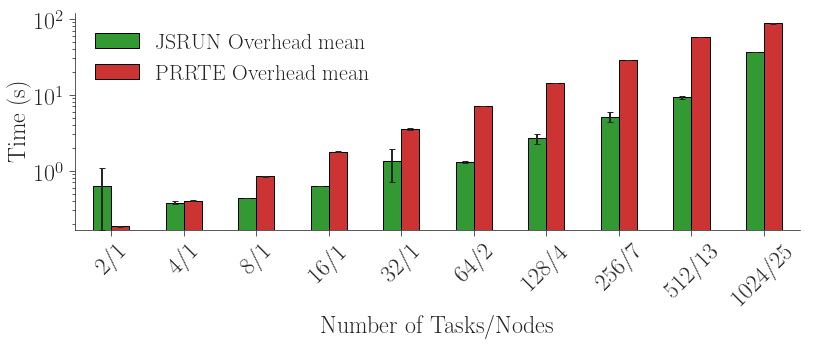

In [20]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh.loc[1:10].plot.bar(
    x='nunitnode', 
    y=['JSRUN Overhead mean','PRRTE Overhead mean'], 
    yerr=[oh.loc[1:10]['JSRUN Overhead std'],oh.loc[1:10]['PRRTE Overhead std']],
    logy=True,
#     stacked=True,
    width=0.5, color=[tableau20[4],tableau20[6]], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.png', dpi=300, bbox_inches='tight')

In [21]:
# fig, ax = fig_setup(figsize=(13,6))

# # oh = oh.fillna(0)

# oh3.plot.bar(
#     x   ='nunitnode', 
#     y   = 'RP Overhead with PRRTE and subagents mean', 
#     yerr= 'RP Overhead with PRRTE and subagents std',
#     #logy=True,
#     width=0.5, color=tableau20[2], ax=ax, rot=45)

# ax.set_xlabel('Number of Tasks/Nodes')
# ax.set_ylabel('Time (s)')
# ax.set_ylim(0)
# # ax.set_xlim(-0.5)

# plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_multiagent.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_multiagent.png')

In [22]:
# fig, ax = fig_setup(figsize=(13,4))

# # Plot means and std bars

# oh3.plot.bar(
#     x='nunitnode', 
#     y='PRRTE Overhead subagents mean', 
#     yerr='PRRTE Overhead subagents std',
#     #logy=True,
#     width=0.5, color=tableau20[6], ax=ax, rot=45) 


# ax.set_xlabel('Number of Tasks/Nodes')
# ax.set_ylabel('Time (s)')

# ax.set_ylim(0)
# ax.set_xlim(-0.5)

# plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_multiagent_overhead.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_multiagent_overhead.png')

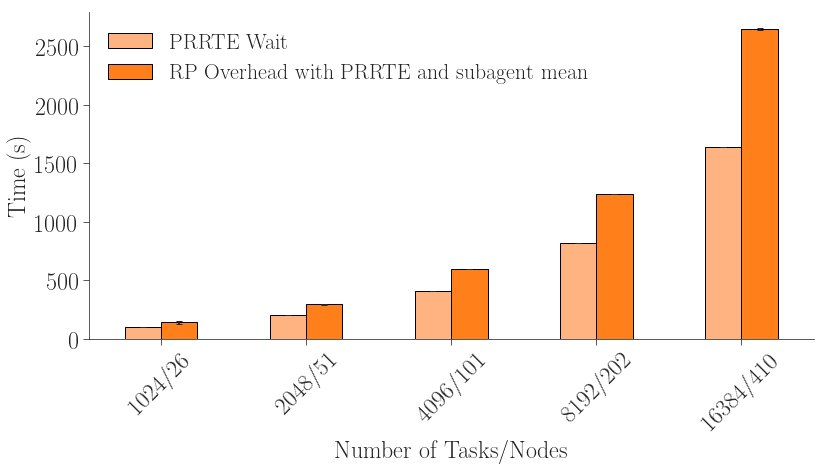

In [23]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh4.plot.bar(
    x   ='nunitnode', 
    y   = ['PRRTE Wait','RP Overhead with PRRTE and subagent mean'], 
    yerr= [oh4['RP Overhead with PRRTE and subagent std']*0,oh4['RP Overhead with PRRTE and subagent std']],
#     logy=True,
#     stacked=True,
    width=0.5, color=[tableau20[3],tableau20[2]], ax=ax, rot=45)


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_subagent.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_subagent.png', dpi=300, bbox_inches='tight')

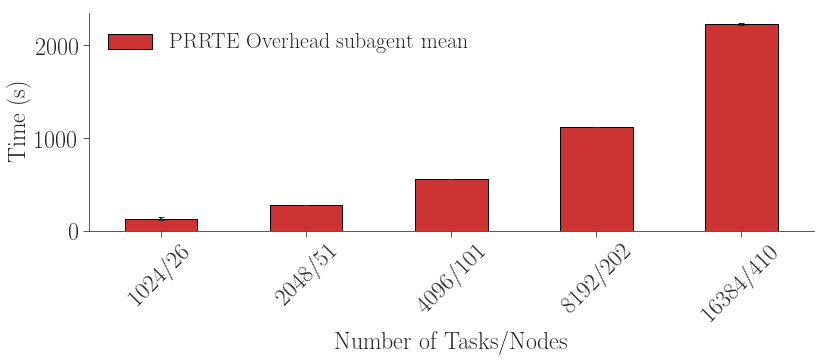

In [24]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh4.plot.bar(
    x='nunitnode', 
    y='PRRTE Overhead subagent mean', 
    yerr='PRRTE Overhead subagent std',
#     logy=True,
    width=0.5, color=tableau20[6], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_subagent_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_subagent_overhead.png', dpi=300, bbox_inches='tight')

In [25]:
oh4_prrte = exp4_prrte_ws.copy(deep=True)

# oh4.loc[:,('TTX Agent','mean')] = oh4.loc[:,('Agent queueing','mean')]           + \
#                                   oh4.loc[:,('Agent scheduling','mean')]         + \
#                                   oh4.loc[:,('Agent queueing execution','mean')] + \
#                                   oh4.loc[:,('TTX Agent','mean')]                - \
#                                   oh4.loc[:,('TTX Unit','mean')]

# oh4.loc[:,('TTX Unit','mean')] = oh4.loc[:,('TTX Unit','mean')] - 900
# oh4.loc[:,('nunit_failed','mean')] = oh4.loc[:,('nunit_failed','mean')].apply(np.ceil)

# oh4.rename({'TTX Agent': 'RP Overhead with PRRTE and subagent'}, axis='columns', inplace=True)
# oh4.rename({'TTX Unit' : 'PRRTE Overhead subagent'}, axis='columns', inplace=True)

oh4_prrte.columns = [' '.join(col).strip() for col in oh4_prrte.columns.values]

oh4_prrte = oh4_prrte.sort_values("nunit")
oh4_prrte = oh4_prrte.reset_index()
oh4_prrte.drop('nunit', axis=1, inplace=True)
# oh4_prrte.drop('nnode', inplace=True)
oh4_prrte

,nunitnode,prte running 2 mean,prte running 2 std,pending allocation mean,pending allocation std,pending daemon launch mean,pending daemon launch std,waitpid fired mean,waitpid fired std,pending mapping mean,...,normally terminated 0 mean,normally terminated 0 std,normally terminated 2 mean,normally terminated 2 std,all daemons reported mean,all daemons reported std,iof complete mean,iof complete std,prte running 0 mean,prte running 0 std
0,1024/26,0.509235,0.145600,0.006935,0.001308,0.006090,0.000750,0.147565,0.000445,0.007485,...,0.014670,0.000028,0.185860,0.003818,0.010760,0.001442,1029.29271,12.481623,9.873005,0.288535
1,2048/51,0.953163,0.219475,0.015270,0.001506,0.013457,0.001303,0.296317,0.002139,0.014853,...,0.029583,0.000284,0.442000,0.042268,0.024310,0.002483,1177.19589,1.710944,25.354217,2.940055
2,4096/101,1.252470,0.042822,0.027570,0.002192,0.024870,0.001513,0.598510,0.001400,0.029100,...,0.059225,0.000035,0.890080,0.106476,0.062535,0.003585,1453.42969,0.828885,61.750490,0.015995
3,8192/202,3.506720,0.511153,0.115885,0.036649,0.051935,0.002539,1.201120,0.005020,0.058580,...,0.128090,0.000113,3.942940,1.479875,0.197520,0.003493,2014.69324,0.857424,181.260795,2.250304
4,16384/410,18.414275,3.342826,0.860760,0.518295,0.162300,0.074190,2.426895,0.000262,0.207595,...,0.260655,0.005296,12.654525,6.933090,0.690315,0.131048,3127.19954,7.844303,515.744380,2.847010


In [26]:
oh4_prrte.rename({'sending launch msg mean': 'pending app launch $>$ sending launch msg'}, axis='columns', inplace=True)
oh4_prrte.rename({'prte running 0 mean'    : 'sending launch msg $>$ running'}, axis='columns', inplace=True)
oh4_prrte.rename({'notify completed mean'  : 'normally terminated $>$ notify completed'}, axis='columns', inplace=True)

oh4_prrte['other'] = (oh4_prrte['pending allocation mean']        + \
                      oh4_prrte['allocation complete mean']       + \
                      oh4_prrte['pending daemon launch mean']     + \
                      oh4_prrte['all daemons reported mean']      + \
                      oh4_prrte['vm ready mean']                  + \
                      oh4_prrte['pending mapping mean']           + \
                      oh4_prrte['prte map complete mean']         + \
                      oh4_prrte['pending final system prep mean'] + \
                      oh4_prrte['pending app launch mean']        + \
                      oh4_prrte['launch complete mean']           + \
                      oh4_prrte['prte running 1 mean']            + \
                      oh4_prrte['prte running 2 mean']            + \
                      # oh4_prrte['iof complete mean']            + \
                      oh4_prrte['waitpid fired mean']             + \
                      oh4_prrte['normally terminated 0 mean']     + \
                      oh4_prrte['normally terminated 1 mean']     + \
                      oh4_prrte['normally terminated 2 mean'])

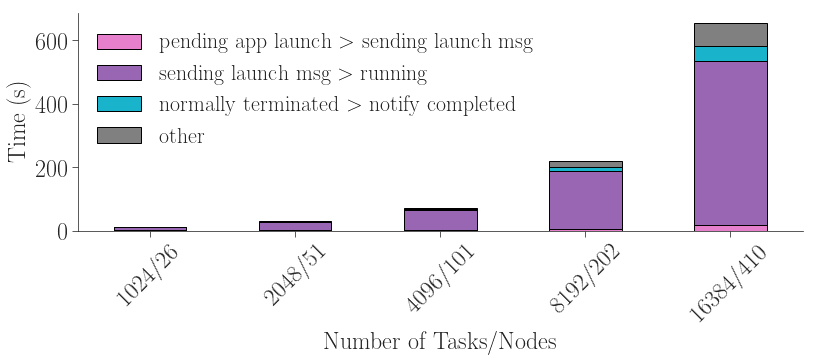

In [27]:
fig, ax = fig_setup(figsize=(13,4))

oh4_prrte.plot.bar(x='nunitnode', 
                   y=[
#                       'pending allocation mean', 
#                       'allocation complete mean', 
#                       'pending daemon launch mean', 
#                       'all daemons reported mean', 
#                       'vm ready mean', 
#                       'pending mapping mean', 
#                       'prte map complete mean', 
#                       'pending final system prep mean', 
#                       'pending app launch mean', 
                      'pending app launch $>$ sending launch msg', #'sending launch msg mean', 
                      'sending launch msg $>$ running',            # 'prte running 0 mean', 
#                       'launch complete mean', 
#                       'prte running 1 mean', 
#                       'prte running 2 mean', 
#                       'iof complete mean', 
#                       'waitpid fired mean', 
#                       'normally terminated 0 mean',
#                       'normally terminated 1 mean', 
#                       'normally terminated 2 mean', 
                      'normally terminated $>$ notify completed', # 'notify completed mean',
                      'other'],
#                  yerr=oh4_prrte.filter(like='std'),
                   stacked=True, 
#                  logy=True, 
                   width=0.5, color=[tableau20[12],tableau20[8],tableau20[16],tableau20[20]], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

plt.savefig('figures/paper_prrte_weak_scaling_prrte_events.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_weak_scaling_prrte_events.png', dpi=300, bbox_inches='tight')

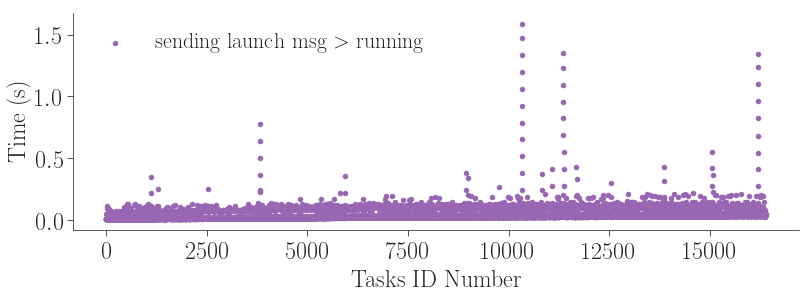

In [28]:
fig, ax = fig_setup(figsize=(13,4))

exp4_prrte_phase2.reset_index().plot.scatter(x='index', y='p2overhead', ax=ax, color=tableau20[8])

ax.legend(['sending launch msg $>$ running'])

ax.set_xlabel('Tasks ID Number')
ax.set_ylabel('Time (s)')

plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_phase2_task_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_phase2_task_overhead.png', dpi=300, bbox_inches='tight')

In [29]:
# Load sessions for experiment 4
ws_sras = load_sessions_units(
    '../data',       # session directory  
    exp4_sessions,   # sessions
    sorted(exp4_sessions.nunit.unique().tolist()) # session nunits
)

From ../data/exp4/rp.session.login4.mturilli1.018119.0001/rp.session.login4.mturilli1.018119.0001.json
From ../data/exp4/rp.session.login4.mturilli1.018123.0001/rp.session.login4.mturilli1.018123.0001.json
From ../data/exp4/rp.session.login4.mturilli1.018127.0001/rp.session.login4.mturilli1.018127.0001.json
From ../data/exp4/rp.session.login4.mturilli1.018123.0002/rp.session.login4.mturilli1.018123.0002.json
From ../data/exp4/rp.session.login4.mturilli1.018127.0002/rp.session.login4.mturilli1.018127.0002.json
From ../data/exp4/rp.session.login4.mturilli1.018128.0000/rp.session.login4.mturilli1.018128.0000.json
From ../data/exp4/rp.session.login4.mturilli1.018128.0001/rp.session.login4.mturilli1.018128.0001.json
From ../data/exp4/rp.session.login4.mturilli1.018122.0002/rp.session.login4.mturilli1.018122.0002.json
From ../data/exp4/rp.session.login4.mturilli1.018122.0003/rp.session.login4.mturilli1.018122.0003.json
From ../data/exp4/rp.session.login4.mturilli1.018129.0000/rp.session.logi

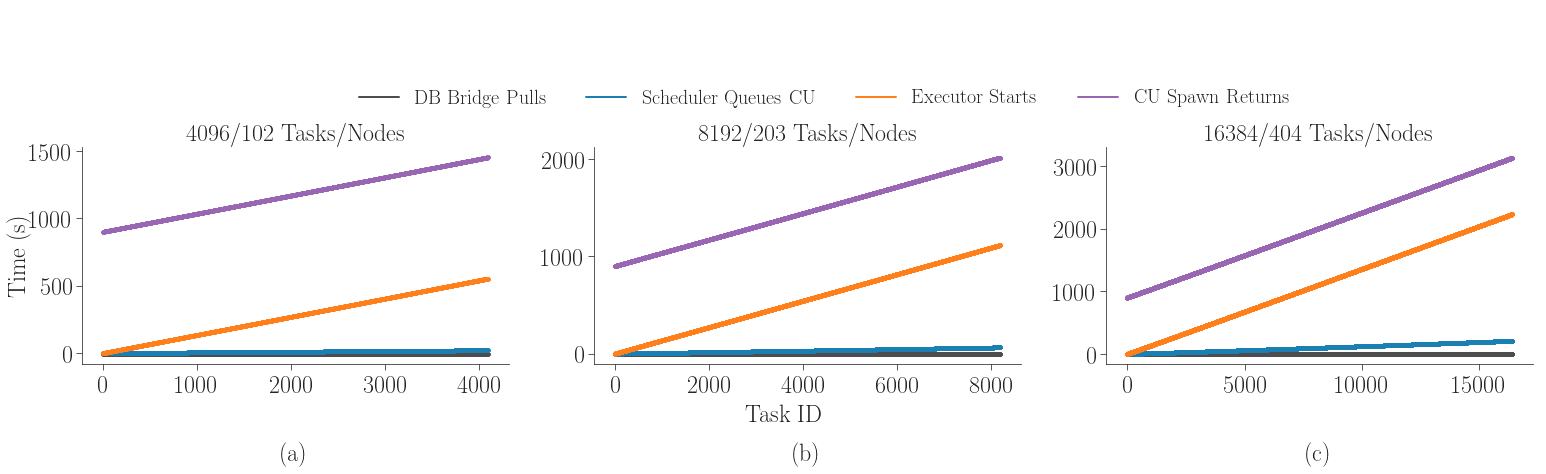

In [30]:
nunits = [4096,8192,16384]
fwidth = 26
fhight = 4
fig, axarr = plt.subplots(1, len(nunits), sharex='col', figsize=(fwidth,fhight))#, sharey='row')

i = 0
j = 'a'
for nunit in nunits:
    session  = ws_sras[nunit][0]

    # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.reset_index(drop=True)
    
    # 'Executable Starts'       , 'Executable Stops'     ,
    
    df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
             'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
             'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
             'CU Spawns Executable'      , 'CU Spawn Returns'        ,
             'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
             'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
    df = df.dropna(axis=1, how='all')
    df = df.sub(df['Scheduler Starts Schedule'][0])

    # Set axes properties
    ax = axarr[i]
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    unode = np.ceil(nunit/41.0)+1
    nnode = unode+(int(np.ceil(unode/166.0)))
    ax.title.set_text('%s/%s Tasks/Nodes' % (nunit, int(nnode)))

    # Plot data
    ax.scatter(df['DB Bridge Pulls'].index    , df['DB Bridge Pulls']    , marker='.', color=tableau20[18]) # Agent Scheduling Component
    ax.scatter(df['Scheduler Queues CU'].index, df['Scheduler Queues CU'], marker='.', color=tableau20[0] ) # Agent Scheduling Component
    ax.scatter(df['Executor Starts'].index    , df['Executor Starts']    , marker='.', color=tableau20[2] ) # Agent Executing Component
    # ax.scatter(df['Executable Starts'].index  , df['Executable Starts']  , marker='.', color=tableau20[4] ) # Synapse
    # ax.scatter(df['Executable Stops'].index   , df['Executable Stops']   , marker='.', color=tableau20[6] ) # Synapse, orterun [orterun spawner]
    ax.scatter(df['CU Spawn Returns'].index   , df['CU Spawn Returns']   , marker='.', color=tableau20[8] ) # CU script
    
    # Add subfigure label and increment counters
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)

# Add common axes lables
fig.text(0.085, 0.5, 'Time (s)', va='center', rotation='vertical', fontsize=24)
fig.text(0.5, -0.08, 'Task ID', ha='center', fontsize=24)
    
# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[18]),
                mpl.lines.Line2D([], [], color=tableau20[0] ), 
                mpl.lines.Line2D([], [], color=tableau20[2] ),
                # mpl.lines.Line2D([], [], color=tableau20[4] ), 
                # mpl.lines.Line2D([], [], color=tableau20[6] ),
                mpl.lines.Line2D([], [], color=tableau20[8] )
           ),
           (
                'DB Bridge Pulls',
                'Scheduler Queues CU',
                'Executor Starts',
                # 'Executable Starts',
                # 'Executable Stops',
                'CU Spawn Returns',
           ), 
           'upper center',
           bbox_to_anchor=(0.44, 1.4),
           fontsize=20,
           ncol=6)

plt.savefig('figures/paper_prrte_weak_scaling_rp_events_timeline.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_weak_scaling_rp_events_timeline.png', dpi=300, bbox_inches='tight')

In [31]:
metrics_prte = [

        # pilot overheads (global)
        ['Pilot Startup',     ['boot', 'setup_1']],
        ['Pilot Termination', ['term' ]],

        # derived pilot durations
        ['Agent Nodes',       ['agent']],
        ['Warmup',            ['cold' ]],
        ['Draining',          ['drain']],
        ['Idle',              ['idle' ]],

        # unit durations (PRTE)
        ['Prepare Execution', ['exec_queue', 'exec_prep']],
        ['Execution RP',      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']],
        ['Execution PRTE',    ['prte_phase_1', 'prte_phase_2', 'prte_phase_3']],
        ['Execution Cmd',     ['exec_cmd']],
        ['Unschedule',        ['unschedule']],
]


metrics_jsrun = [

        # pilot overheads (global)
        ['Pilot Startup',     ['boot', 'setup_1']],
        ['Pilot Termination', ['term' ]],

        # derived pilot durations
        ['Agent Nodes',       ['agent']],
        ['Warmup',            ['cold' ]],
        ['Draining',          ['drain']],
        ['Idle',              ['idle' ]],

        # unit durations (PRTE)
        ['Prepare Execution', ['exec_queue', 'exec_prep']],
        ['Execution RP',      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']],
        ['Execution Cmd',     ['exec_cmd']],
        ['Unschedule',        ['unschedule']],
]

In [32]:
# sessions exp4
exp4_sids = sorted(['../data/exp4/'+s for s in exp4_sessions.drop_duplicates(['nunit']).index.unique().tolist()])
exp4_sobjs = ra.Experiment(exp4_sids, stype='radical.pilot')

In [34]:
# choose the metrics we want to use for resource utilization
metrics = metrics_prte

# get utilization information
provided, consumed, stats = exp4_sobjs.utilization(metrics=metrics)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


using prte configuration

rp.session.login4.mturilli1.018122.0002 [8192]
    Pilot Startup       :    1522123.155     2.1%      ['boot', 'setup_1']
    Pilot Termination   :     290118.333     0.4%      ['term']
    Agent Nodes         :     362990.832     0.5%      ['agent']
    Warmup              :    1080947.982     1.5%      ['cold']
    Draining            :   14143181.846    19.3%      ['drain']
    Idle                :    3695250.387     5.0%      ['idle']
    Prepare Execution   :   12929029.116    17.6%      ['exec_queue', 'exec_prep']
    Execution RP        :      11485.342     0.0%      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']
    Execution PRTE      :        951.747     0.0%      ['prte_phase_1', 'prte_phase_2', 'prte_phase_3']
    Execution Cmd       :   22118985.936    30.2%      ['exec_cmd']
    Unschedule          :        287.090     0.0%      ['unschedule']
    total               :   73324148.001   100.0%      

    total               :   73324148.001   100.

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


rp.session.login4.mturilli1.018129.0000 [16384]
    Pilot Startup       :    2911958.835     1.3%      ['boot', 'setup_1']
    Pilot Termination   :     586612.826     0.3%      ['term']
    Agent Nodes         :     558840.205     0.2%      ['agent']
    Warmup              :    5717684.199     2.5%      ['cold']
    Draining            :   56609568.407    24.7%      ['drain']
    Idle                :   15363482.876     6.7%      ['idle']
    Prepare Execution   :   49740803.861    21.7%      ['exec_queue', 'exec_prep']
    Execution RP        :      35088.178     0.0%      ['exec_rp', 'exec_sh', 'term_sh', 'term_rp']
    Execution PRTE      :       1610.500     0.0%      ['prte_phase_1', 'prte_phase_2', 'prte_phase_3']
    Execution Cmd       :   44238437.854    19.3%      ['exec_cmd']
    Unschedule          :       1715.970     0.0%      ['unschedule']
    total               :  229124483.886   100.0%      

    total               :  229124483.886   100.0%
    over              

In [33]:
# x-axis labels
xkeys = list()

# get the numbers we actually want to plot
for session in exp4_sobjs.sessions:

    n_units = len(session.get(etype='unit'))
    
    p_size = 0
    for pilot in session.get(etype='pilot'):
        p_size += pilot.description['cores']

    xkeys.append('%s / %s' % (n_units, p_size))

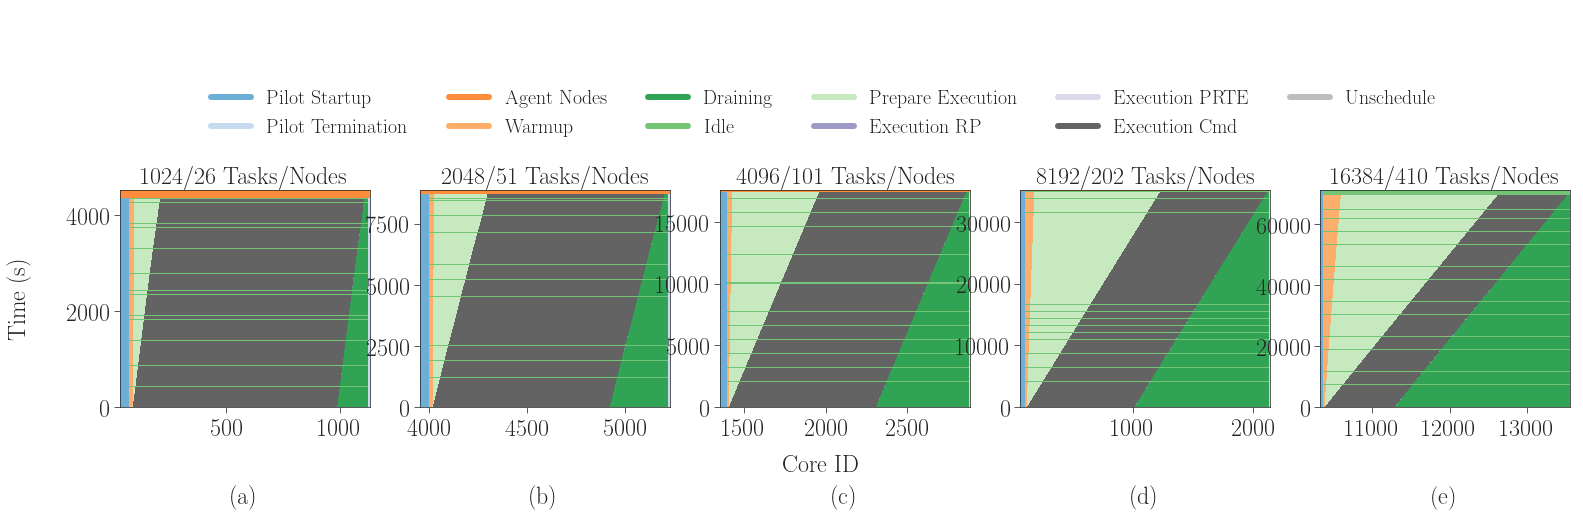

In [65]:
# core utilization over time (box plot)

sids = [ 'rp.session.login4.mturilli1.018119.0001', # 1024
         'rp.session.login4.mturilli1.018127.0001', # 2048
         'rp.session.login4.mturilli1.018128.0000', # 4096
         'rp.session.login4.mturilli1.018122.0002', # 8192
         'rp.session.login4.mturilli1.018129.0000'] # 16384

fwidth = 32
fhight = 4
fig, axarr = plt.subplots(1,
                          len(sids),
                          sharex='col',
                          figsize=(fwidth, fhight))  # , sharey='row')

i = 0
j = 'a'
for sid in sids:

    ax = axarr[i]
    cmap = mpl.cm.get_cmap('tab20c')

    step = 1.0 / (len(metrics) + 1)
    this = step / 1.0
    legend = list()

    x_min = None
    x_max = None
    y_min = None
    y_max = None
    
    ax.title.set_text('%s/%s Tasks/Nodes' % (exp4_sessions.loc[sid].nunit, int(exp4_sessions.loc[sid].nnode)))

    for metric in metrics:

        color = cmap(this)
        this += step

        legend.append(mpl.lines.Line2D([0], [0], color=color, lw=6))

        if isinstance(metric, list):
            name = metric[0]
            parts = metric[1]
        else:
            name = metric
            parts = [metric]

        for part in parts:
            for uid in consumed[sid][part]:
                for block in consumed[sid][part][uid]:
                    orig_x = block[0]
                    orig_y = block[2] - 0.5
                    width = block[1] - block[0]
                    height = block[3] - block[2] + 1.0

                    if x_min is None:
                        x_min = orig_x
                    if x_max is None:
                        x_min = orig_x + width
                    if y_min is None:
                        y_min = orig_x
                    if y_max is None:
                        y_min = orig_x + height

                    x_min = min(x_min, orig_x)
                    y_min = min(y_min, orig_y)
                    x_max = max(x_max, orig_x + width)
                    y_max = max(y_max, orig_y + height)

                    patch = mpl.patches.Rectangle((orig_x, orig_y),
                                                  width, height,
                                                  facecolor=color,
                                                  edgecolor='black',
                                                  fill=True, lw=0.0)
                    ax.add_patch(patch)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)

# Add common axes lables
fig.text(0.065, 0.5, 'Core ID', va='center', rotation='vertical', fontsize=24)
fig.text(0.5, -0.1, 'Time (s)', ha='center', fontsize=24)
    
# Add legend
fig.legend(legend, 
           [m[0] for m in metrics], 
           loc='upper center', 
           bbox_to_anchor=(0.44, 1.55),
           fontsize=20,
           ncol=6)

plt.savefig('figures/paper_prrte_weak_scaling_ru.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_weak_scaling_ru.png', dpi=300, bbox_inches='tight')

In [ ]:
# plt.figure(figsize=(20, 14))

# cmap = mpl.cm.get_cmap('tab20c')
# step = 1.0 / (len(metrics) + 1)
# this = step / 1.0
# legend = list()

# xkeys = sorted(xkeys)
# bottom = np.zeros(len(xkeys))
# labels = list()
# plots = list()
# ind = np.arange(len(xkeys))  # locations for the bars on the x-axis
# width = 0.35                      # width of the bars

# totals = dict()
# for sid in stats:
#     totals[sid] = stats[sid]['total']

# for metric in metrics + ['Other']:

#     color = cmap(this)
#     this += step

#     legend.append(mpl.lines.Line2D([0], [0], color=color, lw=6))

#     if isinstance(metric, list):
#         name = metric[0]
#         parts = metric[1]
#     else:
#         name = metric
#         parts = [metric]

#     values = [100.0 * stats[sid][name] / totals[sid] for sid in stats]
    
#     plots.append(plt.bar(ind, values, width, bottom=bottom, color=color))
    
#     bottom += values
#     labels.append(name)

# if False:
#     plt.ylabel('utilization (% of total resources)')
# else:
#     plt.ylabel('utilization (in core-seconds)')

# plt.xlabel('\#CU / \#cores')
# plt.ylabel('utilization (\% of total resources)')
# plt.title('pilot utilization over workload size (#units)')
# plt.xticks(ind, xkeys)

# plt.legend([p[0] for p in plots], labels, ncol=5, loc='upper left',
#            bbox_to_anchor=(0, 1.2))

# plt.savefig('08c_core_utilization.png')
# # plt.savefig('08c_core_utilization.pdf')